In [34]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [35]:
df=pd.read_excel('stringaprobo.xlsx')

In [36]:
df1=df.drop(columns=['carrera','legajo','cantidad_idiomas'])

In [37]:
df1

,nombre_carrera,ingreso,sexo,pais_procedencia,prov_procedencia,edad,estado_civil,cant_hijos,vive_con,tiene_beca,...,idioma_ingles,idioma_franc,idioma_portu,idioma_itali,idioma_aleman,matcursprisem,fechaapro_matematica_al_21-10-2017,cantmataprob_al_21-10-2017,promedio_con_aplaz_al_21-10-2017,promedio_sin_aplaz_al_21-10-2017
0,Ciencias Biológicas,2017,h,argentina,cordoba,45,casado,0,solo,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,0,1,0,2,1
1,Ciencias Geológicas,2017,m,argentina,cordoba,25,soltero,0,familia de origen,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,1,1,1,2,1
2,Ingeniería en Computación,2014,h,argentina,cordoba,23,soltero,0,familia de origen,n,...,bueno-muy bueno,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,2,0,2,2,1
3,Ingeniería Civil,2016,h,argentina,cordoba,22,soltero,0,solo,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,0,0,3,2,1
4,Ciencias Biológicas,2015,h,argentina,otra,26,soltero,0,solo,si,...,bueno-muy bueno,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,Ingeniería Ambiental,2017,m,argentina,otra,28,soltero,0,familia de origen,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,2,1,1,2,1
2366,Ingeniería Civil,2017,h,argentina,otra,22,soltero,2,solo,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,3,0,2,2,1
2367,Técnico Mecánico Electricista,2017,h,argentina,otra,22,soltero,0,familia de origen,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,1,1,0,2,1
2368,Constructor,2017,h,argentina,cordoba,25,soltero,0,familia de origen,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,5,0,3,2,1


In [38]:
inputs = pd.get_dummies(df1, columns=['nombre_carrera', 'ingreso', 'sexo', 'pais_procedencia',
       'prov_procedencia', 'edad', 'estado_civil', 'cant_hijos', 'vive_con',
       'tiene_beca', 'aporte_familiar', 'obra_social', 'trabajo', 'padre_vive',
       'padre_ult_est_curs', 'padre_trabajo', 'madre_vive',
       'madre_ult_est_curs', 'madre_trabajo', 'dep_practica', 'idioma_ingles',
       'idioma_franc', 'idioma_portu', 'idioma_itali', 'idioma_aleman'])


In [39]:
inputs

,matcursprisem,fechaapro_matematica_al_21-10-2017,cantmataprob_al_21-10-2017,promedio_con_aplaz_al_21-10-2017,promedio_sin_aplaz_al_21-10-2017,nombre_carrera_Ciencias Biológicas,nombre_carrera_Ciencias Geológicas,nombre_carrera_Constructor,nombre_carrera_Ingeniería Aeronáutica,nombre_carrera_Ingeniería Ambiental,...,idioma_ingles_basico-desonoce,idioma_ingles_bueno-muy bueno,idioma_franc_basico-desonoce,idioma_franc_bueno-muy bueno,idioma_portu_basico-desonoce,idioma_portu_bueno-muy bueno,idioma_itali_basico-desonoce,idioma_itali_bueno-muy bueno,idioma_aleman_basico-desonoce,idioma_aleman_bueno-muy bueno
0,0,1,0,2,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,1,1,1,2,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,2,0,2,2,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,3,2,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,1,0,2,1,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,2,1,1,2,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2366,3,0,2,2,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2367,1,1,0,2,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2368,5,0,3,2,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


In [40]:
target=np.array(inputs['fechaapro_matematica_al_21-10-2017'])
inputs=inputs.drop(columns=['matcursprisem','fechaapro_matematica_al_21-10-2017', 
                            'cantmataprob_al_21-10-2017','promedio_con_aplaz_al_21-10-2017', 
                            'promedio_sin_aplaz_al_21-10-2017'])

In [41]:
inputs_list=list(inputs.columns)
inputs=np.array(inputs)

In [42]:
from sklearn.model_selection import train_test_split

train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [43]:
print('Training Features Shape:', train_inputs.shape)
print('Training Labels Shape:', train_target.shape)
print('Testing Features Shape:', test_inputs.shape)
print('Testing Labels Shape:', test_target.shape)

Training Features Shape: (1896, 132)
Training Labels Shape: (1896,)
Testing Features Shape: (474, 132)
Testing Labels Shape: (474,)


In [44]:
from sklearn import tree
Tree=tree.DecisionTreeClassifier()
Tree.fit(train_inputs, train_target)

DecisionTreeClassifier()

In [45]:
y_pred = Tree.predict(test_inputs)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target, y_pred)
cm

array([[206, 107],
       [ 71,  90]])

In [47]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target, y_pred)

In [48]:
accuracy

0.6244725738396625

In [21]:
model_params={
    'tree':{
        'model':tree.DecisionTreeClassifier(),
        'params':{
            'min_samples_split':[10,50,100],
            'min_samples_leaf':[10,50,100],
            'max_depth': [5,10],
            'criterion':['gini','entropy'],
            'class_weight':[{1:1}, {1:2.7}]}
        }
     }

In [22]:
from sklearn.model_selection import GridSearchCV
score=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)
    
    clf.fit(train_inputs, train_target)
    
    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [23]:
df=pd.DataFrame(score,columns=['model','best_score','best_params'])

In [24]:
df.to_excel('arbolbest.xls')

<ipython-input-24-a5f522be84e4>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('arbolbest.xls')


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [26]:
predictions = clf.predict(test_inputs)

In [27]:
accuracy_score(test_target, predictions)

0.7447257383966245

In [28]:
cm=confusion_matrix(test_target, predictions)
cm

array([[271,  42],
       [ 79,  82]])

Text(24.0, 0.5, 'Target')

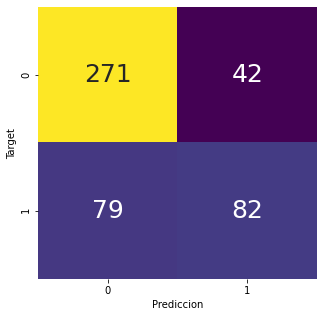

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=True, 
           yticklabels=True,
           cmap="viridis", 
           cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Target')

In [30]:
tp, fp, fn, tn = confusion_matrix(test_target , predictions).ravel()
print("Number of true positives  (tp) = ",tp)
print("Number of true negatives  (tn) = ",tn)

print("Number of false positives (fp) = ",fp)
print("Number of false negatives (fn) = ",fn)

print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true positives  (tp) =  271
Number of true negatives  (tn) =  82
Number of false positives (fp) =  42
Number of false negatives (fn) =  79
Precision                                          = tp / (tp + fp) = 0.865814696485623
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.7742857142857142
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.6612903225806451
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.3387096774193548
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.2257142857142857


AUC =  0.6875657333359791


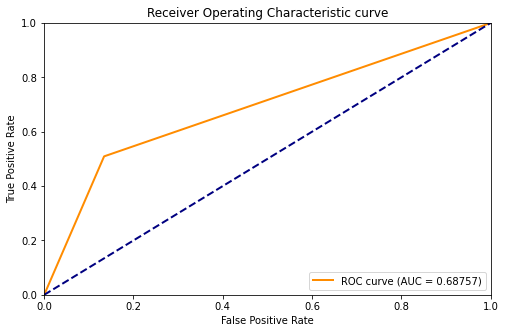

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_target , predictions)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test_target , predictions)
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
f1_score(test_target , predictions)

0.575438596491228

In [33]:
# Get numerical feature importances
importances = list(clf.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(inputs_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: aporte_familiar_sin ayuda familiar Importance: 0.42
Variable: madre_ult_est_curs_univesitario-superior Importance: 0.13
Variable: edad_21              Importance: 0.12
Variable: edad_20              Importance: 0.09
Variable: nombre_carrera_Ciencias Biológicas Importance: 0.08
Variable: edad_22              Importance: 0.05
Variable: madre_ult_est_curs_secundario Importance: 0.04
Variable: padre_ult_est_curs_primario Importance: 0.02
Variable: madre_trabajo_desconoce Importance: 0.02
Variable: idioma_ingles_bueno-muy bueno Importance: 0.02
Variable: padre_ult_est_curs_secundario Importance: 0.01
Variable: nombre_carrera_Ciencias Geológicas Importance: 0.0
Variable: nombre_carrera_Constructor Importance: 0.0
Variable: nombre_carrera_Ingeniería Aeronáutica Importance: 0.0
Variable: nombre_carrera_Ingeniería Ambiental Importance: 0.0
Variable: nombre_carrera_Ingeniería Biomédica Importance: 0.0
Variable: nombre_carrera_Ingeniería Civil Importance: 0.0
Variable: nombre_carrera_In

In [28]:
btree=tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf= 50, min_samples_split=10
)
btree.fit(train_inputs, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

with open(r"tree1.txt", 'w') as f:
     f = tree.export_graphviz(btree,
                              out_file=f,
                              #max_depth = 5,
                              impurity = True,
                              feature_names = list(inputs_list),
                              #class_names= ['uno','dos','tres','cuatro','cinco','seis'],
                              rounded = True,
                              filled= True )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [30]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
#from StringIO import StringIO
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

In [31]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())